In [34]:
import os
import cv2
import skimage.io
import tqdm
import h5py
import zipfile
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TRAIN = '/home/zhaoxun/codes/Panda/_data/train_images'
MASKS = '/home/zhaoxun/codes/Panda/_data/train_label_masks'
LABEL = '/home/zhaoxun/codes/Panda/_data/train.csv'
sz = 128
N = 16

def tile(img, mask):
    result = []
    shape = img.shape
    pad0, pad1 = (sz - shape[0] % sz) % sz, (sz - shape[1] % sz) % sz
    img = np.pad(img, [[pad0 // 2, pad0-pad0 // 2], [pad1 // 2, pad1-pad1 // 2], [0, 0]], constant_values = 255)
    mask = np.pad(mask, [[pad0 // 2, pad0-pad0 // 2], [pad1 // 2, pad1-pad1 // 2], [0, 0]], constant_values = 0)
    img = img.reshape(img.shape[0] // sz, sz, img.shape[1] // sz, sz, 3)
    img = img.transpose(0, 2, 1, 3, 4).reshape(-1, sz, sz, 3)
    mask = mask.reshape(mask.shape[0] // sz, sz, mask.shape[1] // sz, sz, 3)
    mask = mask.transpose(0, 2, 1, 3, 4).reshape(-1, sz, sz, 3)
    if len(img) < N:
        print(1)
        mask = np.pad(mask, [[0, N - len(img)], [0, 0], [0, 0], [0, 0]], constant_values = 0)
        img = np.pad(img, [[0, N - len(img)], [0, 0], [0, 0], [0, 0]], constant_values = 255)
    idxs = np.argsort((np.mean(img, axis = 3) < 220).reshape(img.shape[0], -1).sum(-1))[-N:]
    img = img[idxs]
    mask = mask[idxs]
    for i in range(len(img)):
        result.append({'img': img[i], 'mask': mask[i], 'idx': i})
    return result

x_tot, x2_tot = [], []
names = [name[:-10] for name in os.listdir(MASKS)]
label = pd.read_csv(LABEL)

wid, hei = [], []
for i, name in enumerate(tqdm.tqdm(names[10:], desc = "iterating..")):
    img = skimage.io.MultiImage(os.path.join(TRAIN, name + '.tiff'))[2]
    msk = skimage.io.MultiImage(os.path.join(MASKS, name + '_mask.tiff'))[2]
    wid.append(img.shape[0])
    hei.append(img.shape[1])
    break

iterating..:   0%|          | 0/10506 [00:00<?, ?it/s]


In [26]:
norm = lambda x: ((x - np.min(x)) / np.ptp(x) * 255).astype(np.uint8)
cat = lambda x: np.concatenate([np.concatenate([x[i * int(len(x) ** 0.5) + j] for j in range(int(len(x) ** 0.5))], axis = 0) for i in range(int(len(x) ** 0.5))], axis = 1)
# plt.imshow(np.mean(img[:20,1200:1220], axis = 2), cmap = "gray")


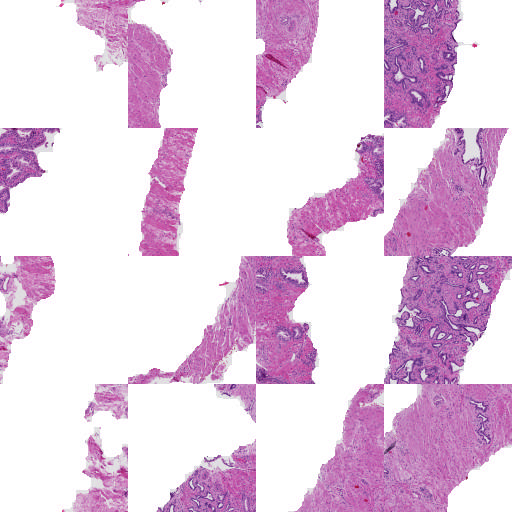

In [35]:
from PIL import Image
sz = 128
N = 16
tiles = tile(img, msk)
Image.fromarray(norm(cat([i['img'] for i in tiles])))